<a href="https://colab.research.google.com/github/xup5/Computational-Neuroscience-Class/blob/main/Lab%203%20Hodgkin-Huxley%20Model/HodgkinHuxley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hodgkin-Huxley Model

Xu Pan, Odelia Schwartz.

In this lab, we will look at Hodgkin-Huxley model, numerically solve the diffential equations and do "patch clamp" experiments in silico.

Note that, since numerical method for DEs is out of our topic, to ease your anxiousness, we use a simple method, Euler's method, to solve the diffential equations. If someone wants a more accurate and efficient way to solve them, they can look into methods such as Runge-Kutta (scipy.solveivp in Python, ode45 in Matlab ).

## Part 1. Passive neuron

Let's first explore the V-I relationship in a passive neuron whose channel conductance is constant. This neuron is equivalent to a simple RC circuit.

This passive neuron model is the basic component of many firing neuron models, besides Hodgkin-Huxley model, integrate-and-fire model and its variants.

\begin{align*}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\
\end{align*}

\begin{align*}
V(t+1) = V(t)+dV(t)
\end{align*}

\begin{align*}
dV(t) = \frac{dt}{\tau_m}(-(V(t)-E_L) + \frac{I}{g_L})
\end{align*}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Time (ms)')

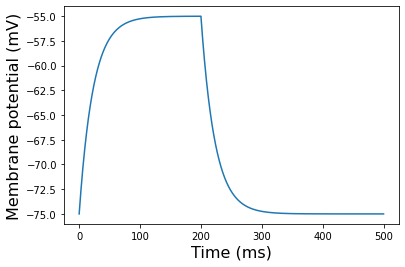

In [ ]:
#@title
tau_m = 23 #@param {type:"slider", min:1, max:100, step:1}
g_L = 10.0       # mS
V_init = -75.0   # mV
E_L = -75.0      # mV
T = 500          # ms
dt = 0.1         # ms
I_0 = 200          # nA/mm2

t = np.arange(0,T,dt)

I = np.zeros(t.shape)
I[0:2000] = I_0

V = np.zeros(t.shape)
V[0] = V_init

# solve the diffential equation by Euler's method
for i in range(t.shape[0]-1):
  dV = dt/tau_m*(-(V[i]-E_L)+I[i]/g_L)
  V[i+1] = V[i] + dV

plt.plot(t, V)
plt.ylabel('Membrane potential (mV)', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)

### Question:

How does the time constant (tau_m = R*C) affect the shape of the membrane potential respoding to an input current? Use the slider to try some different values.

## Part 2. Hodgkin-Huxley model

\begin{align*}
C_m\frac{dV_m}{d_t}=-\bar{g}_Kn^4(V_m-E_K)-\bar{g}_{Na}m^3h(V_m-E_{Na})-\bar{g}_L(V_m-E_L)+I(t)
\end{align*}

\begin{align*}
\frac{dn}{dt}=\alpha_n(V)(1-n)-\beta_n(V)n
\end{align*}

\begin{align*}
\frac{dm}{dt}=\alpha_m(V)(1-m)-\beta_m(V)m
\end{align*}

\begin{align*}
\frac{dh}{dt}=\alpha_h(V)(1-h)-\beta_h(V)h
\end{align*}

These parameters are from Computational Neuroscience class by Larry Abbott at Columbia University. https://ctn.zuckermaninstitute.columbia.edu/sites/default/files/content/IntroTheorNeuro20%20Assign3.pdf

\begin{align*}
\alpha_n(V)=\frac{0.01(V+55)}{1-exp(-0.1(V+55))},\space\space\beta_n(V)=0.125exp(-0.0125(V+65))
\end{align*}


\begin{align*}
\alpha_m(V)=\frac{0.1(V+40)}{1-exp(-0.1(V+40))},\space\space\beta_m(V)=4exp(-0.0556(V+65))
\end{align*}


\begin{align*}
\alpha_h(V)=0.07exp(-0.05(V+65)),\space\space\beta_h(V)=1/(1+exp(-0.1(V+35))
\end{align*}

In [ ]:
def alpha_n(V):
  return 0.01*(V+55)/(1-np.exp(-0.1*(V+55)))

def beta_n(V):
  return 0.125*np.exp(-0.0125*(V+65))

def alpha_m(V):
  return 0.1*(V+40)/(1-np.exp(-0.1*(V+40)))

def beta_m(V):
  return 4*np.exp(-0.0556*(V+65))

def alpha_h(V):
  return 0.07*np.exp(-0.05*(V+65))

def beta_h(V):
  return 1/(1+np.exp(-0.1*(V+35)))

We can rearrange the gated-channel differential equation to:
\begin{align*}
\alpha_n(V)(1-n)-\beta_n(V)n =  (n_\infty(V)-n)/\tau_n(V)
\end{align*}
n<sub>∞</sub> is the asymptotic (steady state) value of n at voltage V.

τ<sub>n</sub> is the time constant.

They are:

\begin{align*}
n_\infty(V) = \frac{\alpha_n(V)}{\alpha_n(V)+\beta_n(V)}
\end{align*}

\begin{align*}
\tau_n(V) = \frac{1}{\alpha_n(V)+\beta_n(V)}
\end{align*}

and similar equations for m and h.

Now lets plot n<sub>∞</sub> and τ<sub>n</sub> versus V.

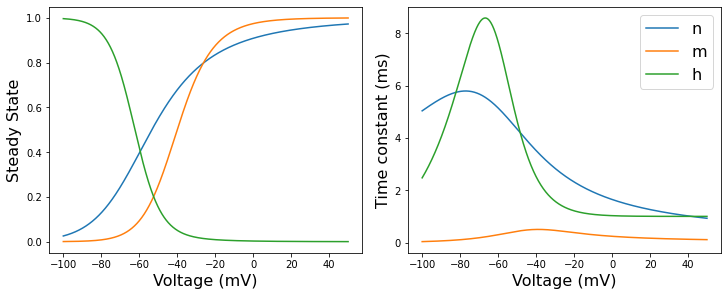

In [ ]:
V = np.arange(-100,50,0.1)

n_inf = alpha_n(V)/(alpha_n(V)+beta_n(V))
m_inf = alpha_m(V)/(alpha_m(V)+beta_m(V))
h_inf = alpha_h(V)/(alpha_h(V)+beta_h(V))

tau_n = 1/(alpha_n(V)+beta_n(V))
tau_m = 1/(alpha_m(V)+beta_m(V))
tau_h = 1/(alpha_h(V)+beta_h(V))

fig, axs = plt.subplots(1,2, constrained_layout=True,figsize=(10, 4))

axs[0].plot(V, n_inf, label='n')
axs[0].plot(V, m_inf, label='m')
axs[0].plot(V, h_inf, label='h')
axs[0].set_ylabel('Steady State', fontsize=16)
axs[0].set_xlabel('Voltage (mV)', fontsize=16)

axs[1].plot(V, tau_n, label='n')
axs[1].plot(V, tau_m, label='m')
axs[1].plot(V, tau_h, label='h')
axs[1].set_ylabel('Time constant (ms)', fontsize=16)
axs[1].set_xlabel('Voltage (mV)', fontsize=16)
axs[1].legend(fontsize=16)

Text(0.5, 0, 'Time (ms)')

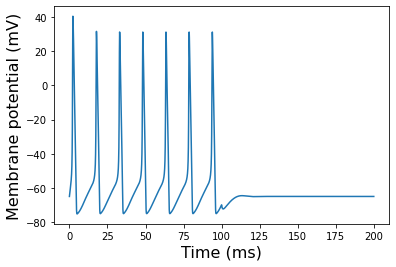

In [ ]:
#@title
I_0 = 0.09 #@param {type:"slider", min:0, max:0.5, step:0.01}
# Now we are ready to run Hodgkin-Huxley model

T = 200 # ms
dt = 0.01 # ms
g_L = 0.003 # mS/mm^2 g_L_bar
g_K = 0.36 # mS/mm^2 g_K_bar
g_Na = 1.2 # mS/mm^2 g_Na_bar
E_L = -54.387 # mV
E_K = -77 # mV
E_Na = 50 # mV
c_m = 0.01 # nF/mm^2

t = np.arange(0,T,dt)
I = np.zeros(t.shape)
V_m = np.zeros(t.shape)
n = np.zeros(t.shape)
m = np.zeros(t.shape)
h = np.zeros(t.shape)

I[0:int(T/dt/2)] = I_0
# initial values
V_m[0] = -65 # mV
n[0] = 0.3177
m[0] = 0.0529
h[0] = 0.5961

for i in range(t.shape[0]-1):
  dV_m = dt/c_m*(-g_K*n[i]**4*(V_m[i]-E_K) - g_Na*m[i]**3*h[i]*(V_m[i]-E_Na) - g_L*(V_m[i]-E_L) + I[i])
  dn = dt*(alpha_n(V_m[i])*(1-n[i]) - beta_n(V_m[i])*n[i])
  dm = dt*(alpha_m(V_m[i])*(1-m[i]) - beta_m(V_m[i])*m[i])
  dh = dt*(alpha_h(V_m[i])*(1-h[i]) - beta_h(V_m[i])*h[i])

  V_m[i+1] = V_m[i] + dV_m
  n[i+1] = n[i] + dn
  m[i+1] = m[i] + dm
  h[i+1] = h[i] + dh

plt.plot(t, V_m)
plt.ylabel('Membrane potential (mV)', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)

Text(0.5, 0, 'Time (ms)')

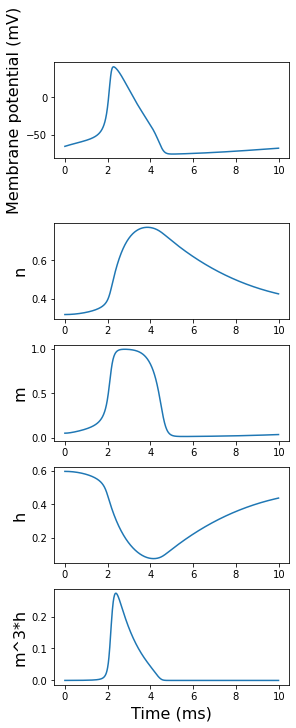

In [ ]:
# Let's look at what happens in one circle:
time_window = 1000 # 10 ms
fig, axs = plt.subplots(5, constrained_layout=True,figsize=(4, 10))

axs[0].plot(t[0:time_window], V_m[0:time_window])
axs[0].set_ylabel('Membrane potential (mV)', fontsize=16)

axs[1].plot(t[0:time_window], n[0:time_window])
axs[1].set_ylabel('n', fontsize=16)

axs[2].plot(t[0:time_window], m[0:time_window])
axs[2].set_ylabel('m', fontsize=16)

axs[3].plot(t[0:time_window], h[0:time_window])
axs[3].set_ylabel('h', fontsize=16)


axs[4].plot(t[0:time_window], m[0:time_window]**3*h[0:time_window])
axs[4].set_ylabel('m^3*h', fontsize=16)

axs[4].set_xlabel('Time (ms)', fontsize=16)

Let's give the neuron a negative input during 0-100 ms. Look what happens after the negative input is taken out.

Text(0.5, 0, 'Time (ms)')

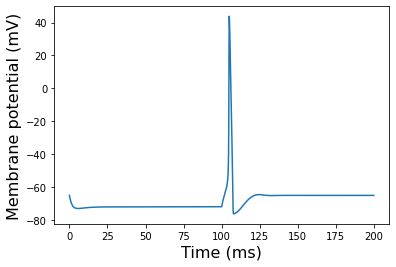

In [ ]:
I_0 = -0.05
# Now we are ready to run Hodgkin-Huxley model

T = 200 # ms
dt = 0.01 # ms
g_L = 0.003 # mS/mm^2 g_L_bar
g_K = 0.36 # mS/mm^2 g_K_bar
g_Na = 1.2 # mS/mm^2 g_Na_bar
E_L = -54.387 # mV
E_K = -77 # mV
E_Na = 50 # mV
c_m = 0.01 # nF/mm^2

t = np.arange(0,T,dt)
I = np.zeros(t.shape)
V_m = np.zeros(t.shape)
n = np.zeros(t.shape)
m = np.zeros(t.shape)
h = np.zeros(t.shape)

I[0:int(T/dt/2)] = I_0
# initial values
V_m[0] = -65 # mV
n[0] = 0.3177
m[0] = 0.0529
h[0] = 0.5961

for i in range(t.shape[0]-1):
  dV_m = dt/c_m*(-g_K*n[i]**4*(V_m[i]-E_K) - g_Na*m[i]**3*h[i]*(V_m[i]-E_Na) - g_L*(V_m[i]-E_L) + I[i])
  dn = dt*(alpha_n(V_m[i])*(1-n[i]) - beta_n(V_m[i])*n[i])
  dm = dt*(alpha_m(V_m[i])*(1-m[i]) - beta_m(V_m[i])*m[i])
  dh = dt*(alpha_h(V_m[i])*(1-h[i]) - beta_h(V_m[i])*h[i])

  V_m[i+1] = V_m[i] + dV_m
  n[i+1] = n[i] + dn
  m[i+1] = m[i] + dm
  h[i+1] = h[i] + dh

plt.plot(t, V_m)
plt.ylabel('Membrane potential (mV)', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)

## Questions

Part 1.

**(a)** How does the time constant (tau_m = R*C) affect the shape of the membrane potential responding to an input current? Use the slider to try some different values.

Part 2.

**(b)** Write a function that can compute the firing rate (# of spikes in a second). Change input current from 0 to 0.5, plot the firing rate versus input current. What do you find? (The behavior you find is called type II behavior. Type I behavior is when firing rate changes continuously with the input.) (If you find it is too hard to compute firing rate, describing what you find qualitatively is ok)

**(c)** You should see a spike after the negative input is taken out. This phenomenon is named post-inhibitory rebound. Researchers do find it in real neurons. Plot the n, m and h. Explain why there is a spike.